# Nguyễn Thị Ánh _ 22000070_Thực hành 2

# Ví dụ A.1.


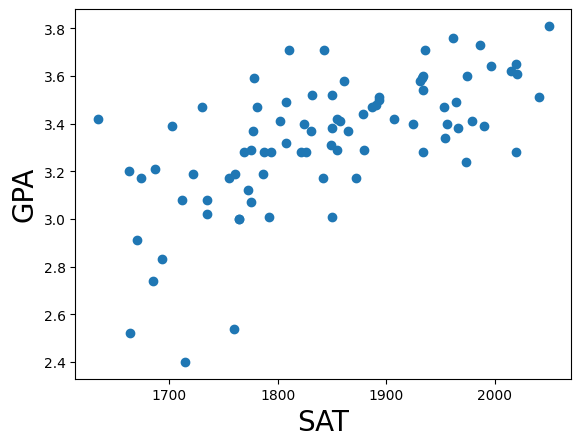

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# Change to data path on your computer
data = \
pd.read_csv("D:\\Hoc may\\Bài thực hành 2\\SAT_GPA.csv")
# Show the description of data
data.describe()
# Set to training data (x, y)
y = data['GPA']
x = data['SAT']
# Remind that we need to put component x_0 = 1 to x
plt.scatter(x,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [3]:
k = 8
def distance(array, value):
    array = np.array(array)
    return abs(array - value)
def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]
data_len = len(x)
X_train = np.array(x[:64])
Y_train = np.array(y[:64])
X_test = np.array(x[64:data_len])
Y_test = np.array(y[64:data_len])
k = 8

In [4]:
Y_pred = np.zeros(len(X_test))
for i in range(len(X_test)):
    indexis = find_nearest_index(X_train, X_test[i], k)
    for id in indexis:
        Y_pred[i] = Y_pred[i] + Y_train[id]
    Y_pred[i] = Y_pred[i]/len(indexis)
    print(Y_pred[i], ' | ', Y_test[i])

MSE = mean_squared_error(Y_test,Y_pred)
MAE = mean_absolute_error(Y_test,Y_pred)
r2= r2_score(Y_test,Y_pred)
print(f"MSE:{MSE}" )
print(f"MAE:{MAE}" )
print(f"R_square:{r2}" )


3.3925000000000005  |  3.51
3.2749999999999995  |  3.52
3.2949999999999995  |  3.52
3.3975000000000004  |  3.54
3.295  |  3.58
3.3974999999999995  |  3.58
3.3975000000000004  |  3.59
3.2587500000000005  |  3.59
3.3899999999999997  |  3.6
3.3975000000000004  |  3.6
3.3874999999999993  |  3.61
3.3874999999999993  |  3.62
3.3662499999999995  |  3.64
3.3874999999999993  |  3.65
3.2950000000000004  |  3.71
3.3975000000000004  |  3.71
3.30875  |  3.71
3.3662500000000004  |  3.73
3.37625  |  3.76
3.3874999999999993  |  3.81
MSE:0.08137789062500003
MAE:0.2711875000000001
R_square:-10.951518670142466


# Ví dụ A.2.

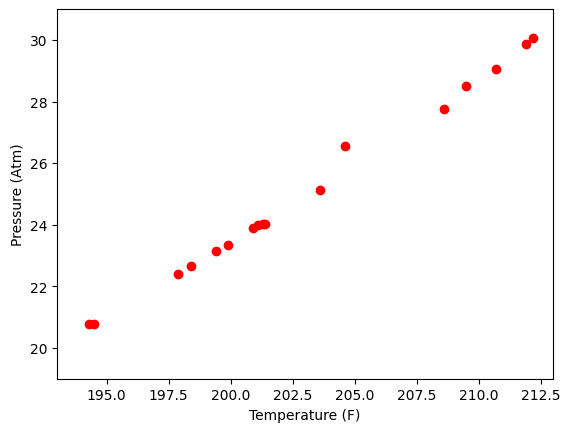

In [5]:
from __future__ import division, print_function, unicode_literals
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()



In [6]:


def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D, axis=0)[:k].flatten()

# Tách tập train và test
data_len = len(X)
X_train = X[:16]
Y_train = y[:16]
X_test = X[16:]
Y_test = y[16:]

# KNN với k=4
k = 4

In [7]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k)
    for id in indices:
        Y_pred[i] += Y_train[id].item()
    Y_pred[i] /= len(indices)
    print(Y_pred[i], ' | ', Y_test[i])

# Đánh giá mô hình
MSE = mean_squared_error(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
if len(Y_test) > 1:
    r2 = r2_score(Y_test, Y_pred)
else:
    r2 = None

print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R_square: {r2}")

28.7925  |  [30.06]
MSE: 1.6065562499999957
MAE: 1.2674999999999983
R_square: None


# Ví dụ A.3.


In [8]:
import math
import numpy as np
with open('D:\\Hoc may\\Bài thực hành 2\\fuel.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [9]:
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1)
print(distance)


def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D, axis=0)[:k].flatten()

# Tách tập train và test
data_len = len(x_data)
X_train = x_data[:36]
Y_train = y_data[:36]
X_test = x_data[36:]
Y_test = y_data[36:]

# KNN với k=6
k = 6

<function distance at 0x00000228D87AF240>


In [10]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k)
    for id in indices:
        Y_pred[i] += Y_train[id].item()
    Y_pred[i] /= len(indices)
    print(Y_pred[i], ' | ', Y_test[i])

# Đánh giá mô hình
MSE = mean_squared_error(Y_test, Y_pred)
MAE = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"R_square: {r2}")

655.6764783825764  |  [657.06051765]
592.3785786995282  |  [556.34551224]
559.4858179597701  |  [518.3286299]
559.4858179597701  |  [482.32693716]
649.9720435413332  |  [711.73305769]
638.4560580336707  |  [697.05277706]
638.4560580336706  |  [638.23106095]
611.9269910198954  |  [681.10013659]
657.4924914892898  |  [591.49994589]
644.4898294882122  |  [691.02271186]
588.0444680617263  |  [681.03112144]
605.0998495739349  |  [576.06974956]
662.653139627235  |  [562.4109333]
592.3785786995282  |  [581.79371695]
644.4898294882122  |  [842.79175243]
MSE: 5764.963933166447
MAE: 59.27734818620825
R_square: 0.2618987918959711


# Ví dụ B.1.


In [11]:
# === BÀI B1: Hồi quy tuyến tính đơn biến (Nhiệt độ - Áp suất) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
# Dữ liệu nhiệt độ và áp suất
X_b1 = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T
y_b1 = np.array([[20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06]]).T


w =  [[-81.06372713]
 [  0.5228924 ]]


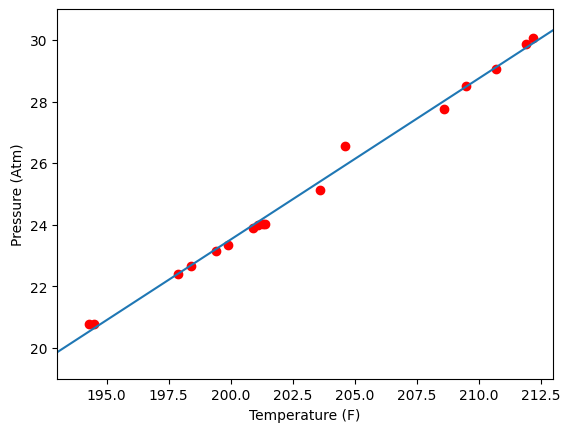

In [12]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)

w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(193, 213, 2)
y0 = w_0 + w_1*x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

# Ví dụ B.2.

In [13]:
# doc du lieu tu tep
import math
import numpy as np
with open('D:\\Hoc may\\Bài thực hành 2\\fuel.txt') as f:

    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [14]:
# Dung thu vien Numpy
def qr_householder(A):
#""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
    # vector to transform
        x = A[n:, n]
        k = x.shape[0]

    # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

    # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

def linear_regression(x_data, y_data):
    # """
        # This function calculate linear regression base on x_data and y_data
        # :param x_data: vector
        # :param y_data: vector
        # :return: w (regression estimate)
        # """

        # add column 1
        x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

        Q, R = qr_householder(x_bars) # QR decomposition
        R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
        A = np.dot(R_pinv, Q.T) # apply formula

        return np.dot(A, y_data)

In [15]:
#chay chuong trinh
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()

line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730794
                 Tax: -4.227983208329624
                Dlic: 0.4718712134419837
              Income: -0.0061353309704178065
            LogMiles: 18.545274506048024


In [16]:
#Dung Scikit-Learn
# doc du lieu tu tep
import math
import numpy as np
with open('D:\\Hoc may\\Bài thực hành 2\\fuel.txt') as f:

    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [17]:
from sklearn import datasets, linear_model
Xbar = np.array(x_data)
y = np.array(y_data)

# Huấn luyện mô hình hồi quy tuyến tính
regr = linear_model.LinearRegression(fit_intercept=False) 
regr.fit(Xbar, y)  # Huấn luyện mô hình

# Hiển thị trọng số của mô hình
print("Hệ số hồi quy (weights):", regr.coef_)




Hệ số hồi quy (weights): [[-3.74051992e+00  5.41605284e-01 -5.11305283e-03  2.18465502e+01]]


# Bài tập B.1.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
 #B1: Hồi quy tuyến tính ước lượng áp suất khí quyển
data_b1 = {
    "Temp": [194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2],
    "Pressure": [20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57, 28.49, 27.76, 29.04, 29.88, 30.06]
}
df_b1 = pd.DataFrame(data_b1)
X_train_b1 = df_b1["Temp"].values.reshape(-1, 1)
y_train_b1 = df_b1["Pressure"].values

model_b1 = LinearRegression()
model_b1.fit(X_train_b1, y_train_b1)
y_pred_b1 = model_b1.predict(X_train_b1)

print("B1 - Hồi quy tuyến tính: áp suất khí quyển")
print("MSE:", mean_squared_error(y_train_b1, y_pred_b1))
print("MAE:", mean_absolute_error(y_train_b1, y_pred_b1))
print("R-square:", r2_score(y_train_b1, y_pred_b1))

B1 - Hồi quy tuyến tính: áp suất khí quyển
MSE: 0.04783194197896838
MAE: 0.1615749422573339
R-square: 0.9944281526462317


# Ví dụ B.3 (Bài tập tự thực hành 1).

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# B3: Hồi quy tuyến tính dự báo điểm GPA từ điểm SAT
df_sat = pd.read_csv("D:\\Hoc may\\Bài thực hành 2\\SAT_GPA.csv")

Hệ số tương quan Pearson: 0.6371843648401909


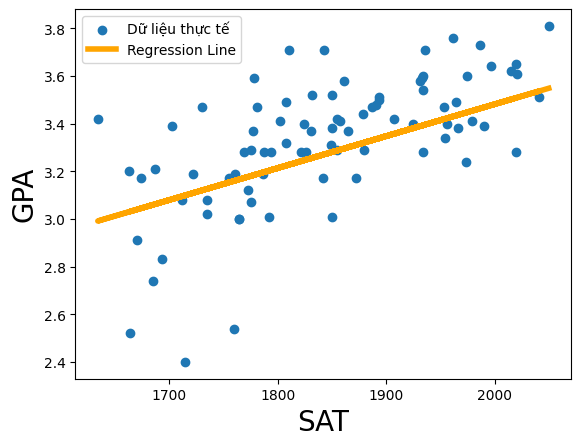

MSE: 0.07042847697824461
MAE: 0.24386672111120394
R-square: -9.343439121492823
MSE (K-NN): 0.08118757812500003
MAE (K-NN): 0.27031250000000007
R-square (K-NN): -10.923568530621244


In [21]:
 #(i) Hệ số tương quan Pearson
pearson_corr, _ = pearsonr(df_sat["SAT"], df_sat["GPA"])
print("Hệ số tương quan Pearson:", pearson_corr)

# (ii) Chia tập dữ liệu
X_train_b3 = df_sat.loc[:64, ["SAT"]].values
y_train_b3 = df_sat.loc[:64, ["GPA"]].values
X_test_b3 = df_sat.loc[64:, ["SAT"]].values
y_test_b3 = df_sat.loc[64:, ["GPA"]].values

# (iii) Xây dựng mô hình hồi quy tuyến tính
model_b3 = LinearRegression()
model_b3.fit(X_train_b3, y_train_b3)

# Hiển thị đường hồi quy
plt.scatter(df_sat["SAT"], df_sat["GPA"], label="Dữ liệu thực tế")
yhat = model_b3.coef_[0] * df_sat["SAT"] + model_b3.intercept_
plt.plot(df_sat["SAT"], yhat, lw=4, c='orange', label='Regression Line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.legend()
plt.show()

# (iv) Dự đoán và đánh giá mô hình
y_pred_b3 = model_b3.predict(X_test_b3)
print("MSE:", mean_squared_error(y_test_b3, y_pred_b3))
print("MAE:", mean_absolute_error(y_test_b3, y_pred_b3))
print("R-square:", r2_score(y_test_b3, y_pred_b3))

# (v) So sánh với K-NN (được thực hiện trong Ví dụ A.1)
k = 8
def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]

data_len = len(df_sat)
X_train_knn = np.array(df_sat.loc[:64, "SAT"])
Y_train_knn = np.array(df_sat.loc[:64, "GPA"])
X_test_knn = np.array(df_sat.loc[64:, "SAT"])
Y_test_knn = np.array(df_sat.loc[64:, "GPA"])

y_pred_knn = np.zeros(len(X_test_knn))
for i in range(len(X_test_knn)):
    indexes = find_nearest_index(X_train_knn, X_test_knn[i], k)
    for idx in indexes:
        y_pred_knn[i] += Y_train_knn[idx]
    y_pred_knn[i] /= len(indexes)

print("MSE (K-NN):", mean_squared_error(Y_test_knn, y_pred_knn))
print("MAE (K-NN):", mean_absolute_error(Y_test_knn, y_pred_knn))
print("R-square (K-NN):", r2_score(Y_test_knn, y_pred_knn))


# Ví dụ B.4 (Bài tập 2).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Đọc dữ liệu từ tệp
file_path = "D:/Hoc may/Bài thực hành 2/vidu3_lin_reg.txt"
df = pd.read_csv(file_path, sep=r'\s+')


In [8]:
# Chọn biến đầu vào (X) và biến đầu ra (y)
X = df[['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']]
y = df['BEDAYNTM']

# Khởi tạo mô hình hồi quy
model = LinearRegression()
# Huấn luyện mô hình trên toàn bộ dữ liệu
model.fit(X, y)
#Hệ số hồi quy
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2, β3, β4, β5):", model.coef_)

Intercept (β0): -0.10802908119386889
Coefficients (β1, β2, β3, β4, β5): [ 0.00994694  0.03847025  0.0076701   0.00218137 -0.00020655]


In [24]:
# Chia tập dữ liệu: 80 dòng đầu dùng cho training, 20 dòng cuối testing
X_train = df.iloc[:80][['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']]
y_train = df.iloc[:80]['BEDAYNTM']

X_test = df.iloc[80:][['TUOI', 'CHOLESTEROL', 'GLUCOSE', 'HA', 'BMI']]
y_test = df.iloc[80:]['BEDAYNTM']

# Huấn luyện mô hình trên tập train
model_train = LinearRegression()
model_train.fit(X_train, y_train)

# Hệ số hồi quy trên tập train
print("Intercept (β0):", model_train.intercept_)
print("Coefficients (β1, β2, β3, β4, β5):", model_train.coef_)

# Dự đoán trên tập test
y_pred = model_train.predict(X_test)

# Tính sai số trung bình bình phương (MSE) và phương sai sai số
mse = mean_squared_error(y_test, y_pred)
variance = np.var(y_test - y_pred)

print(f"MSE (Mean Squared Error): {mse}")
print(f"Variance of Errors: {variance}")


Intercept (β0): 0.0430643641032975
Coefficients (β1, β2, β3, β4, β5): [ 0.0089892   0.00708535  0.00808634  0.00260218 -0.00047742]
MSE (Mean Squared Error): 0.22740099167615907
Variance of Errors: 0.22100281283267015


# Ví dụ B.5 (Bài tập 3).

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Đọc dữ liệu từ tệp
file_path = "D:/Hoc may/Bài thực hành 2/Real_estate.csv."
df = pd.read_csv(file_path)

In [26]:
# Bỏ cột x1 (Số thứ tự)
df = df.iloc[:, 1:]

# Lấy phần nguyên của năm giao dịch (cột x2)
df.iloc[:, 0] = df.iloc[:, 0].astype(int)

# Chia tập dữ liệu: 350 mẫu đầu làm training, còn lại làm validation
df_train = df.iloc[:350]
df_val = df.iloc[350:]


X_train = df_train.iloc[:, :-1]  # Lấy các cột x2 đến x6
y_train = df_train.iloc[:, -1]   # Cột Y (giá căn nhà)


X_val = df_val.iloc[:, :-1]
y_val = df_val.iloc[:, -1]


In [27]:
# Khởi tạo và huấn luyện mô hình
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_lin = lin_reg.predict(X_val)

# Tính tổng bình phương sai số (MSE)
mse_lin = mean_squared_error(y_val, y_pred_lin)
print(f"MSE (Linear Regression): {mse_lin}")


MSE (Linear Regression): 63.80695061605305


In [28]:
# Khởi tạo mô hình K-NN với K=18
knn_reg = KNeighborsRegressor(n_neighbors=18)
knn_reg.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_knn = knn_reg.predict(X_val)

# Tính MSE cho K-NN
mse_knn = mean_squared_error(y_val, y_pred_knn)
print(f"MSE (K-NN with K=18): {mse_knn}")


MSE (K-NN with K=18): 44.102133969907406


In [29]:
print("So sánh tổng bình phương sai số:")
print(f"- Linear Regression MSE: {mse_lin}")
print(f"- K-NN (K=18) MSE: {mse_knn}")

if mse_lin < mse_knn:
    print("Linear Regression tốt hơn.")
else:
    print("K-NN tốt hơn.")


So sánh tổng bình phương sai số:
- Linear Regression MSE: 63.80695061605305
- K-NN (K=18) MSE: 44.102133969907406
K-NN tốt hơn.
